In [13]:
!pip install xgboost
!pip install scikit-learn


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , mean_absolute_error


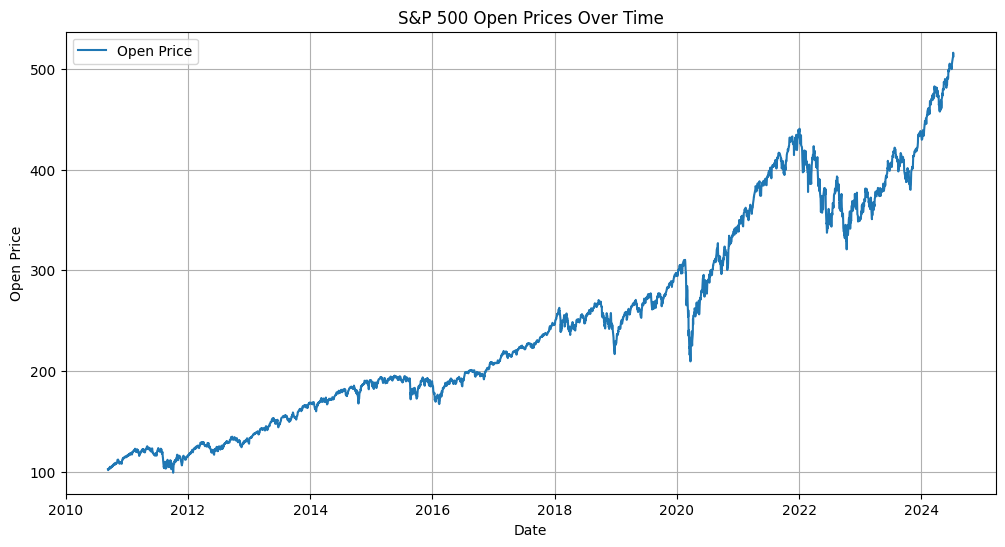

In [15]:
# Load the CSV file
data = pd.read_csv('14yearSNP.csv')

# Create a dictionary with dates as keys and the 'Open' prices as values
price_dict = {row['Date']: row[' Open'] for _, row in data.iterrows()}

# Convert the dictionary back into a DataFrame
price_df = pd.DataFrame(list(price_dict.items()), columns=['Date', 'Open'])

# Convert the 'Date' column to datetime format
price_df['Date'] = pd.to_datetime(price_df['Date'], format='%m/%d/%y')

# Sort the DataFrame by date
price_df = price_df.sort_values('Date')

# Set the 'Date' column as the index
price_df.set_index('Date', inplace=True)

# Plot the 'Open' prices over time
plt.figure(figsize=(12, 6))
plt.plot(price_df.index, price_df['Open'], label='Open Price')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('S&P 500 Open Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
def create_features(df, label=None):
    df['Date'] = df.index
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    df['day'] = df['Date'].dt.day
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['weekofyear'] = df['Date'].dt.isocalendar().week
    X = df[['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(price_df, label='Open')



In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [19]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [24]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')



Mean Squared Error: 2847.521090078476
Mean Absolute Error: 40.05715469450547
Mean Absolute Percentage Error (MAPE): 9.49693466852442%


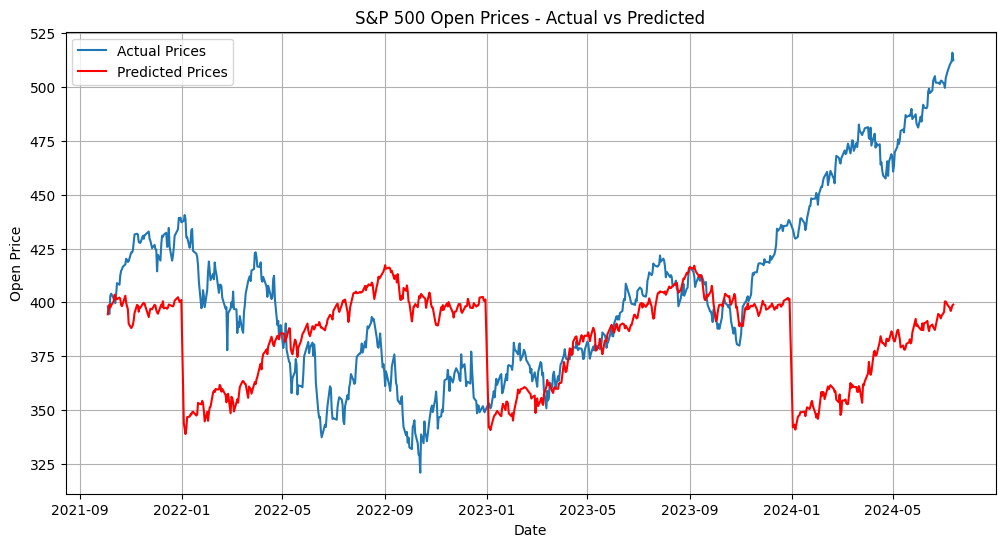

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(price_df.index[-len(y_test):], y_test, label='Actual Prices')
plt.plot(price_df.index[-len(y_test):], y_pred, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('S&P 500 Open Prices - Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()
